In [1]:
import pandas as pd
import numpy as np
import cartopy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy import config

In [2]:
df = pd.read_csv('../data/sabancaya/seismic-data/query.csv')
df_ref = df[df['depth'] < 30]
df_ref

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-02-26T01:40:31.794Z,-15.9980,-72.0610,10.000,4.1,mb,21.0,178.0,2.875,0.66,...,2024-03-12T22:43:11.040Z,"5 km WNW of Lluta, Peru",earthquake,11.22,1.994,0.123,18.0,reviewed,us,us
2,2023-12-10T16:10:55.405Z,-15.6591,-72.2564,11.469,4.0,mb,12.0,128.0,3.260,1.18,...,2024-02-17T22:43:05.040Z,"3 km NE of Ayo, Peru",earthquake,11.74,2.884,0.260,7.0,reviewed,us,us
3,2023-10-31T22:13:49.191Z,-15.6045,-71.7692,10.000,4.5,mb,39.0,134.0,2.952,0.85,...,2024-01-18T21:11:05.637Z,"4 km N of Maca, Peru",earthquake,10.59,1.866,0.088,38.0,reviewed,us,us
8,2023-06-06T17:53:22.213Z,-15.8589,-72.2625,10.000,4.4,mb,38.0,92.0,3.100,0.61,...,2023-08-12T17:15:05.040Z,"19 km S of Ayo, Peru",earthquake,8.78,1.263,0.112,25.0,reviewed,us,us
9,2023-06-05T13:25:15.423Z,-15.7861,-71.8108,10.000,4.3,mb,30.0,133.0,2.865,0.86,...,2023-08-12T17:15:03.040Z,southern Peru,earthquake,7.96,1.593,0.188,8.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2013-06-16T16:26:13.190Z,-15.7210,-71.8710,9.900,4.9,mb,46.0,90.0,NaN,0.78,...,2014-11-07T01:51:05.146Z,"14 km SW of Maca, Peru",earthquake,NaN,1.700,NaN,28.0,reviewed,us,us
122,2013-03-23T22:37:35.770Z,-15.8940,-71.8450,25.500,4.7,mb,65.0,91.3,NaN,1.05,...,2014-11-07T01:50:22.633Z,"22 km NE of Lluta, Peru",earthquake,NaN,14.200,NaN,30.0,reviewed,us,us
126,2013-02-22T21:50:49.560Z,-15.8260,-71.4950,18.400,5.2,mb,220.0,78.3,NaN,1.40,...,2022-05-03T16:07:30.433Z,"7 km SSW of Huarancante, Peru",earthquake,NaN,16.600,NaN,157.0,reviewed,us,us
127,2013-02-22T21:01:47.230Z,-15.7480,-71.4250,7.900,5.3,mb,135.0,88.3,NaN,1.25,...,2022-05-03T16:07:25.102Z,"4 km ENE of Huarancante, Peru",earthquake,NaN,14.100,NaN,75.0,reviewed,us,us


In [3]:
df_2012 = df_ref[df_ref['time'] < '2013']
df_2015 = df_ref[(df_ref['time'] > '2012') & (df_ref['time'] < '2016')]
df_2018 = df_ref[(df_ref['time'] > '2015') & (df_ref['time'] < '2019')]
df_2021 = df_ref[(df_ref['time'] > '2018') & (df_ref['time'] < '2022')]
df_2024 = df_ref[df_ref['time'] > '2021']

In [4]:
central_lon, central_lat = -71.857, -15.787
extent = [-72.86, -70.86, -14.79, -16.79]
sabancaya = (central_lon, central_lat)

In [5]:
from cartopy.io.img_tiles import GoogleTiles
class ShadedReliefESRI(GoogleTiles):
    # shaded relief
    def _image_url(self, tile):
        x, y, z = tile
        url = ('https://server.arcgisonline.com/ArcGIS/rest/services/' \
               'World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg').format(
               z=z, y=y, x=x)
        return url

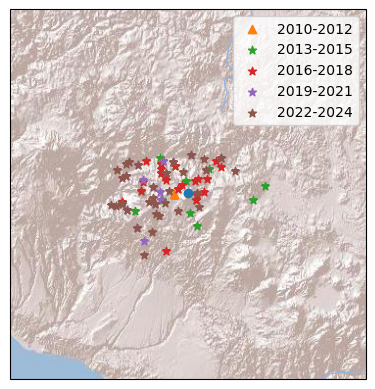

In [6]:
ax = plt.axes(projection=ShadedReliefESRI().crs)
ax.set_extent(extent)
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS)
ax.scatter(central_lon, central_lat, marker='o', transform=ccrs.Geodetic())
ax.scatter(df_2012['longitude'], df_2012['latitude'], label='2010-2012', marker='^', transform=ccrs.Geodetic())
ax.scatter(df_2015['longitude'], df_2015['latitude'], label='2013-2015', marker='*', transform=ccrs.Geodetic())
ax.scatter(df_2018['longitude'], df_2018['latitude'], label='2016-2018', marker='*', transform=ccrs.Geodetic())
ax.scatter(df_2021['longitude'], df_2021['latitude'], label='2019-2021', marker='*', transform=ccrs.Geodetic())
ax.scatter(df_2024['longitude'], df_2024['latitude'], label='2022-2024', marker='*', transform=ccrs.Geodetic())
ax.legend()
# ax.coastlines(resolution='10m')
ax.add_image(ShadedReliefESRI(), 8)

In [7]:
years = np.arange('2011', '2025', dtype='datetime64')
bbox=dict(boxstyle='round', fc='white', ec='k', alpha=0.75)

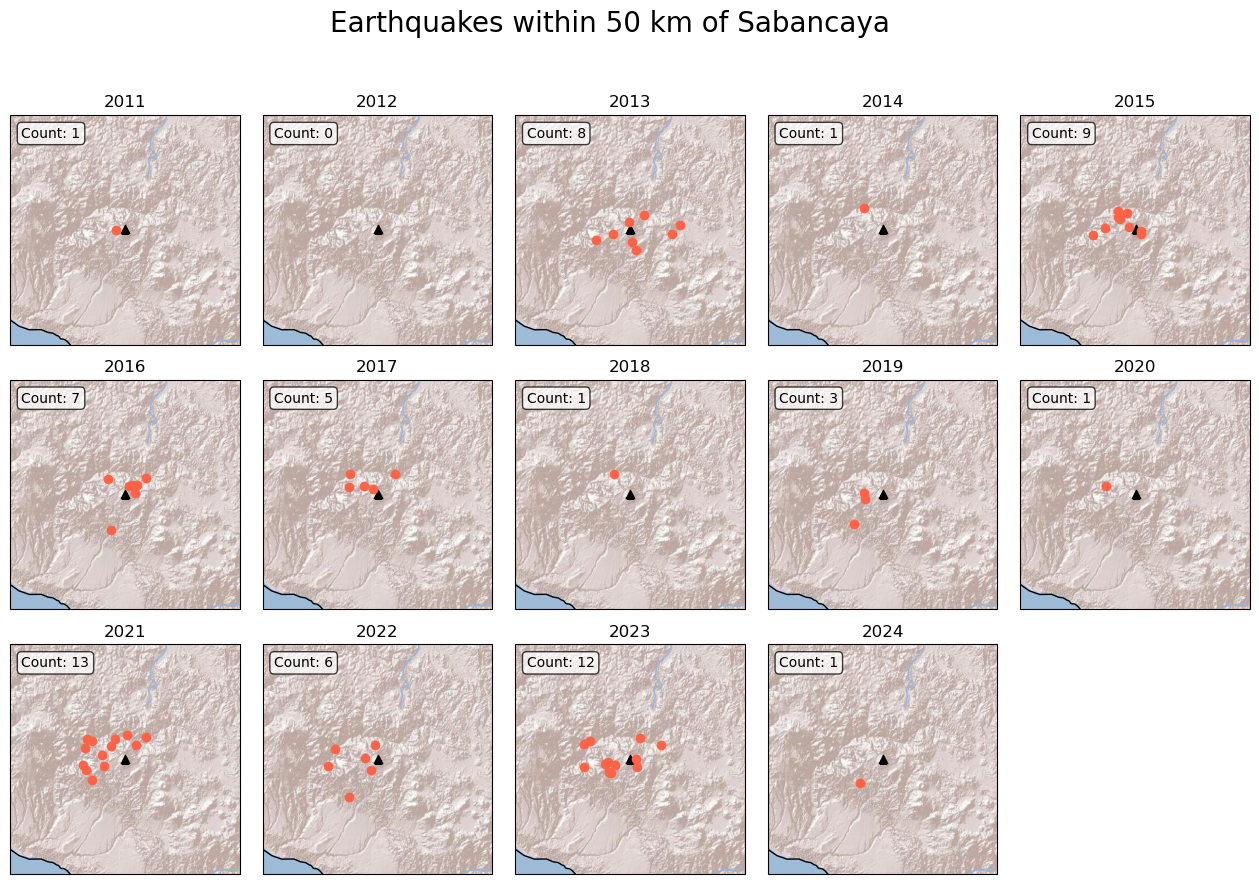

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(16,10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
yearly_sum = []

for i, year in enumerate(years):
    ax = axes[i]
    ax.add_feature(cfeature.RIVERS)
    ax.scatter(central_lon, central_lat, marker='^', color='k', transform=ccrs.PlateCarree())
    ax.set_extent(extent)
    df_plot = df_ref.query(f'time.str.contains("{year}")', engine='python')
    ax.add_image(ShadedReliefESRI(), 8)
    ax.scatter(df_plot['longitude'], df_plot['latitude'], marker='o', color='tomato')
    ax.set_title(f"{year}")
    ax.coastlines()
    ax.text((extent[0]+.1), (extent[2]-.1), f"Count: {len(df_plot)}", transform=ccrs.PlateCarree(), va='top', bbox=bbox)
    
    # Extra line to allow yearly sum of the data
    yearly_sum.append(len(df_plot))

axes[-1].set_visible(False)
plt.suptitle("Earthquakes within 50 km of Sabancaya", fontsize=20)
plt.subplots_adjust(wspace=.1, hspace=.1)
plt.savefig('../figures/earthquakes.png', bbox_inches='tight')

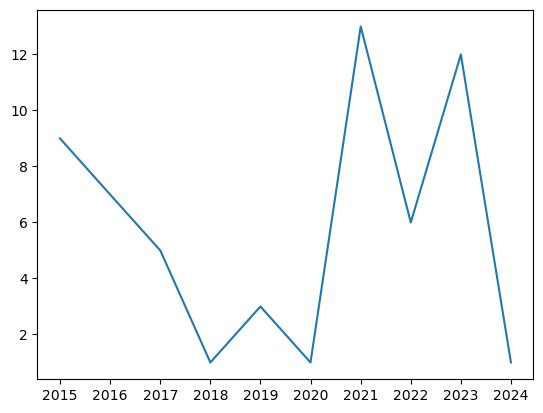

In [9]:
plt.plot(years[4:], yearly_sum[4:])

In [10]:
yearly_sum[4:]

[9, 7, 5, 1, 3, 1, 13, 6, 12, 1]

In [12]:
df_ref.to_csv('../data/refined-seismic.csv')